In [3]:
import pandas as pd 
import numpy as np

In [5]:
housing = pd.read_csv("housing.csv")

In [6]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## EDA and Feature engineering

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
import pandas as pd


housing = housing.dropna()

In [9]:
housing['CHAS'].value_counts()

CHAS
0.0    367
1.0     27
Name: count, dtype: int64

In [10]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
housing.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,False,False,False,False,False,False,False,False,False,False,False,False,False,False
500,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
has_nan = np.isnan(housing).any()

In [13]:
has_nan

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [14]:
np.isinf(housing).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [15]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

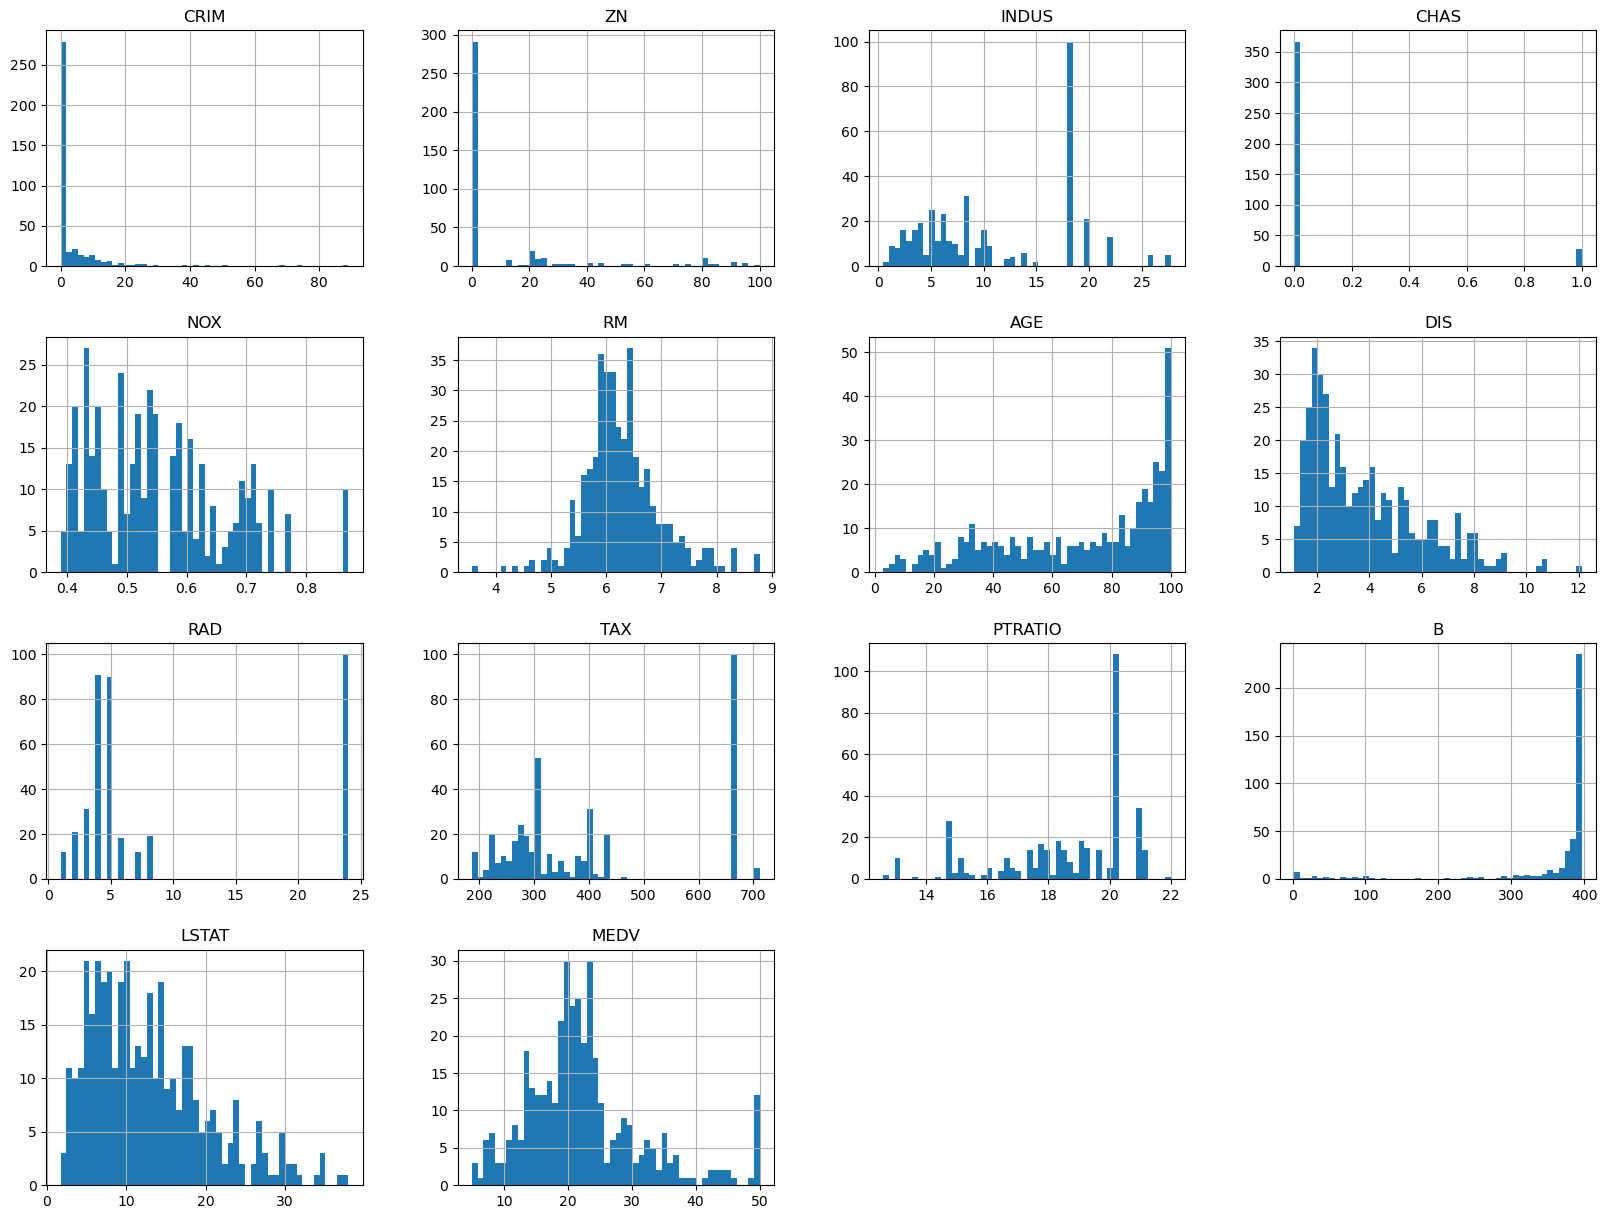

In [16]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))

## Train Test Spilit

In [17]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
train_set, test_set = split_train_test(housing, 0.2)

In [19]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 316
Rows in test set: 78


In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 315
Rows in test set: 79


In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
housing.reset_index(drop=True, inplace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [22]:
strat_test_set['CHAS'].value_counts()

CHAS
0.0    74
1.0     5
Name: count, dtype: int64

In [23]:
strat_train_set['CHAS'].value_counts()

CHAS
0.0    293
1.0     22
Name: count, dtype: int64

In [24]:
housing = strat_train_set.copy()

## Looking for correlations

In [25]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696808
ZN         0.397121
B          0.366832
DIS        0.314251
CHAS       0.162370
RAD       -0.429900
CRIM      -0.433003
AGE       -0.451049
NOX       -0.488618
PTRATIO   -0.515254
TAX       -0.516588
INDUS     -0.529225
LSTAT     -0.760489
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

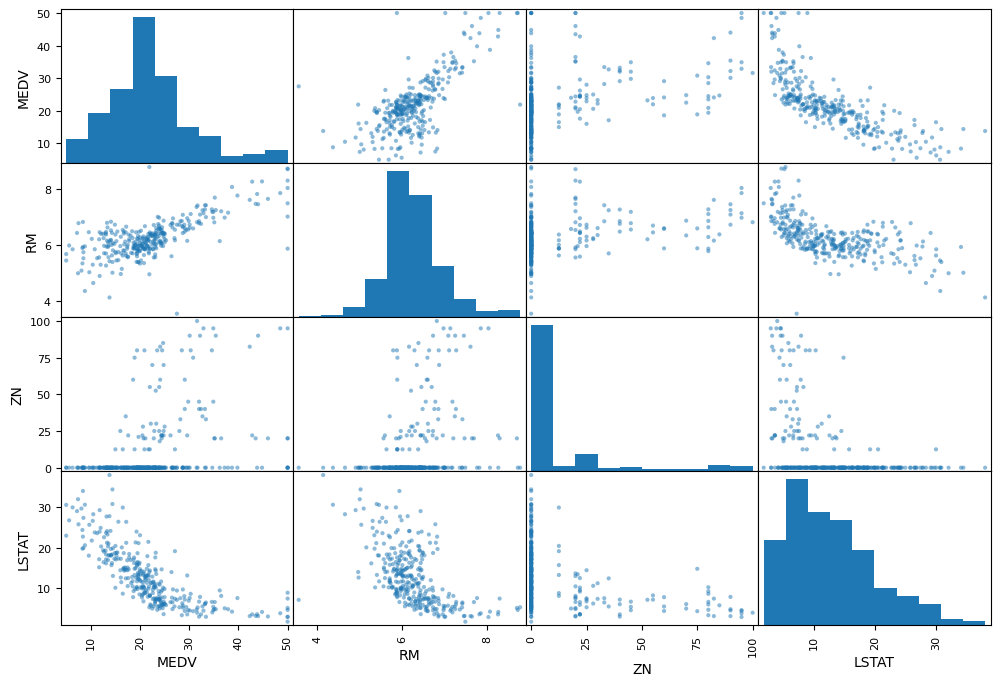

In [26]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize= (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

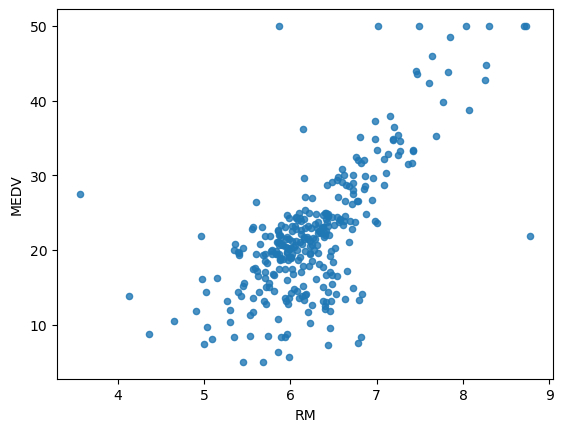

In [27]:
housing.plot(kind = "scatter", x = "RM", y="MEDV", alpha=0.8)

##  Trying out Attributes combinations

In [28]:
housing["TAXPM"] = housing["TAX"]/housing["RM"]

In [30]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXPM
368,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
199,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3,244,15.9,386.34,3.11,44.0,32.734102
324,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24,666,20.2,21.57,25.79,7.5,98.201121
89,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5,384,20.9,394.05,16.47,19.5,65.629807
343,9.96654,0.0,18.10,0.0,0.740,6.485,100.0,1.9784,24,666,20.2,386.73,18.85,15.4,102.698535


In [31]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696808
ZN         0.397121
B          0.366832
DIS        0.314251
CHAS       0.162370
RAD       -0.429900
CRIM      -0.433003
AGE       -0.451049
NOX       -0.488618
PTRATIO   -0.515254
TAX       -0.516588
INDUS     -0.529225
TAXPM     -0.579682
LSTAT     -0.760489
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXPM', ylabel='MEDV'>

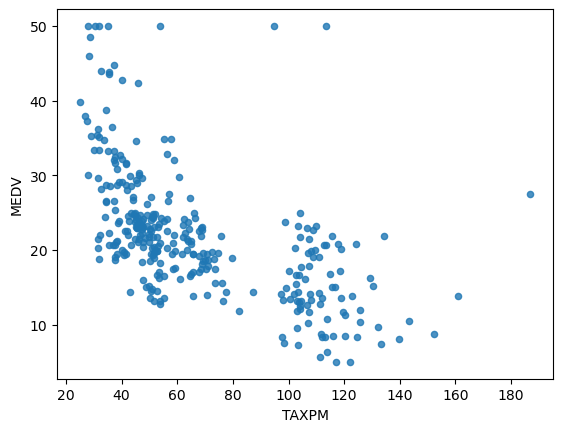

In [32]:
housing.plot(kind = "scatter", x = "TAXPM", y="MEDV", alpha=0.8)

In [33]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_lebels = strat_train_set["MEDV"].copy()

## Missing Attributes

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit (housing)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([2.6938e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.3800e-01,
       6.1850e+00, 7.7300e+01, 3.2628e+00, 5.0000e+00, 3.3000e+02,
       1.9100e+01, 3.9230e+02, 1.1450e+01])

In [36]:
X = imputer.transform(housing)

In [37]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [38]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,3.544795,11.107937,11.099206,0.069841,0.552733,6.263537,69.069524,3.790850,9.409524,408.111111,18.555238,358.068000,12.771270
std,8.452387,23.951771,6.894365,0.255285,0.113680,0.681615,27.654691,2.052634,8.698812,168.669778,2.092798,89.861766,7.159835
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000
25%,0.081005,0.000000,5.190000,0.000000,0.448500,5.878500,45.750000,2.123450,4.000000,282.500000,17.400000,376.815000,7.160000
50%,0.269380,0.000000,8.560000,0.000000,0.538000,6.185000,77.300000,3.262800,5.000000,330.000000,19.100000,392.300000,11.450000
75%,3.521480,0.000000,18.100000,0.000000,0.624000,6.571000,94.100000,5.057250,24.000000,666.000000,20.200000,396.900000,17.140000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,37.970000


## Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
   
    ('std_scaler', StandardScaler()),
])

In [40]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [41]:
housing_num_tr.shape

(315, 13)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_lebels)

RandomForestRegressor()